# LangChain Expression Language(LCEL) Deepdive

Topics:
- Moving from old index to new pipe base index
- Understanding ruunables
  - RunnableParallel
  - RunnablePassthrough
  - RunnableLambda
  - Assign
- Performence improvement (inference speed)
  - Async invoke
  - Batch support
  - Async Batch
- Using Itemgetter with LCEL
- Bind tools 
- Stream Support

In [6]:
from utils.llm import LLM

/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [8]:
llm = LLM().get_llm_together()

### Old Syntax - Without LCEL

In [3]:
template = 'Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n'

In [2]:
from langchain import PromptTemplate,  LLMChain # To create PromptTemplate and LLMChain

In [4]:
# define the input variable in Prompt Templete
prompt = PromptTemplate(template=template, input_variables=["skill"])
print(prompt)

input_variables=['skill'] template='Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n'


In [9]:
llm_chain = LLMChain(prompt=prompt, llm=llm)

/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [10]:
print(llm_chain.run('Data Science'))

/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(



1. **Python**: Python is the most popular language for data science. It's easy to learn and has a large community of users.
2. **Statistics**: Understanding statistics is crucial for data science. You'll need to know concepts like mean, median, mode, standard deviation, correlation, regression, and hypothesis testing.
3. **Data Manipulation**: You'll need to be able to clean and manipulate data using tools like Pandas and NumPy in Python.
4. **Machine Learning**: Machine learning is a key part of data science. You'll need to understand concepts like supervised and unsupervised learning, neural networks, and deep learning.
5. **Data Visualization**: Being able to effectively communicate your findings is important. Tools like Matplotlib, Seaborn, and Tableau can help you create clear and informative visualizations.

Good luck on your data science journey! Let me know if you have any questions.


### LCEL
- cleaner 
- Simple 

In [17]:
from langchain_core.output_parsers import StrOutputParser

In [18]:
prompt = PromptTemplate.from_template(template=template)

chain = prompt | llm 

print(chain.invoke({'skill':'Big Data'}))


1. Hadoop MapReduce: MapReduce is the core processing engine of Hadoop. It is used to process large data sets in parallel across a distributed cluster of servers.
2. Hive: Hive is a data warehousing tool built on top of Hadoop. It provides an SQL-like interface for querying and managing large data sets stored in Hadoop.
3. Pig: Pig is a data flow language and platform for analyzing large data sets. It is similar to SQL but is designed to work with large data sets and can handle complex data transformations.
4. HBase: HBase is a NoSQL database built on top of Hadoop. It is used for storing and managing large, structured data sets with low latency.
5. Spark: Spark is an open-source, distributed computing system used for big data processing. It can handle batch processing, streaming data, and machine learning tasks. It is faster than Hadoop MapReduce and can integrate with Hive, Pig, and HBase.

These are the top 5 things to learn for someone starting out with Big Data. Good luck with yo

### Adding parser

In [19]:
prompt = PromptTemplate.from_template(template=template)
parser = StrOutputParser()

chain = prompt | llm | parser

print(chain.invoke({'skill':'Big Data'}))


1. Hadoop MapReduce: MapReduce is the core processing engine of Hadoop. It is used to process large data sets in parallel across a distributed cluster of servers.
2. Hive: Hive is a data warehousing tool built on top of Hadoop. It provides an SQL-like interface for querying and managing large data sets stored in Hadoop.
3. Pig: Pig is a data flow language and platform for analyzing large data sets. It is similar to SQL but is designed to work with large data sets and can handle complex data transformations.
4. HBase: HBase is a NoSQL database built on top of Hadoop. It is used for storing and managing large, structured data sets with low latency.
5. Spark: Spark is an open-source, distributed computing system used for big data processing. It can handle batch processing, streaming data, and machine learning tasks. It is faster than Hadoop MapReduce and can integrate with Hive, Pig, and HBase.

These are the top 5 things to learn for someone starting out with Big Data. Good luck with yo

### Each class implements Invoke method

In [20]:
prompt.invoke({'skill':'Big Data'})

StringPromptValue(text='Hi! I am learning Big Data. Can you suggest me top 5 things to learn?\n')

In [21]:
msg = prompt.invoke({'skill':'Big Data'})
print(msg)

text='Hi! I am learning Big Data. Can you suggest me top 5 things to learn?\n'


In [22]:
print(llm.invoke(msg))


1. Hadoop MapReduce: MapReduce is the core processing engine of Hadoop. It is used to process large data sets in parallel across a distributed cluster of servers.
2. Hive: Hive is a data warehousing tool built on top of Hadoop. It provides an SQL-like interface for querying and managing large data sets stored in Hadoop.
3. Pig: Pig is a data flow language and platform for analyzing large data sets. It is similar to SQL but is designed to work with large data sets and can handle complex data transformations.
4. HBase: HBase is a NoSQL database built on top of Hadoop. It is used for storing and managing large, structured data sets with low latency.
5. Spark: Spark is an open-source, distributed computing system used for big data processing. It can handle batch processing, streaming data, and machine learning tasks. It is faster than Hadoop MapReduce and can integrate with Hive, Pig, and HBase.

These are the top 5 things to learn for someone starting out with Big Data. Good luck with yo

### Runnables

In [24]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough , RunnableLambda

### RunnablePassthrough

In [25]:
chain = RunnablePassthrough() | RunnablePassthrough() | RunnablePassthrough()

In [26]:
chain.invoke('Welcome to this youtube channel')

'Welcome to this youtube channel'

### RunnableLambda

In [205]:
def string_upper(input):
    return input.upper()

In [28]:
chain = RunnablePassthrough() | RunnableLambda(string_upper)

In [30]:
chain.invoke('Welcome to this youtube channel')

'WELCOME TO THIS YOUTUBE CHANNEL'

### Invoke method with RunnableLambda

In [208]:
string_upper.invoke

AttributeError: 'function' object has no attribute 'invoke'

In [206]:
a = RunnableLambda(string_upper)

In [207]:
a.invoke('Hi')

'HI'

### RunnableParallel
- Running multiple tasks with same input 
- It also creats branches (with different functionalities)

In [75]:
chain = RunnableParallel({'x':RunnablePassthrough(),'y':RunnablePassthrough()})

In [76]:
chain.invoke('Youtube')

{'x': 'Youtube', 'y': 'Youtube'}

In [77]:
chain.invoke({'Youtube': '@AritraSen','Blog': 'Denken'})

{'x': {'Youtube': '@AritraSen', 'Blog': 'Denken'},
 'y': {'Youtube': '@AritraSen', 'Blog': 'Denken'}}

In [209]:
chain = RunnableParallel({'x':RunnablePassthrough(),'Blog':lambda x: x['Blog']})

In [212]:
chain.invoke({'Youtube': '@AritraSen','Blog': 'Denken'})

{'x': {'Youtube': '@AritraSen', 'Blog': 'Denken'}, 'Blog': 'Denken'}

In [80]:
def fetch_website(input: dict):
    output = input.get('Website','Not found')
    return output

In [81]:
chain = RunnableParallel({'Website':RunnablePassthrough() | RunnableLambda(fetch_website),
                          'Blog':lambda z: z['Blog']})

In [82]:
chain.invoke({'Youtube': '@AritraSen','Blog': 'Denken'})

{'Website': 'Not found', 'Blog': 'Denken'}

In [83]:
chain.invoke({'Youtube': '@AritraSen','Blog': 'Denken' , 'Website' : 'aritrasen.com'})

{'Website': 'aritrasen.com', 'Blog': 'Denken'}

### Assign: for adding keys in a chain

In [84]:
def extra_func(input):
    return 'Happy Learning'

In [85]:
chain = RunnableParallel({'x' : RunnablePassthrough()}).assign(exta=RunnableLambda(extra_func))

In [86]:
chain.invoke('Hello')

{'x': 'Hello', 'exta': 'Happy Learning'}

### RAG Pipeline

In [139]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma

### Reading the txt files from source directory

loader = DirectoryLoader('./source', glob="./*.txt", loader_cls=TextLoader)
docs = loader.load()

### Creating Chunks using RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=10,
    length_function=len
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

###  BGE Embddings

from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)

### Creating Retriever using Vector DB

db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 4})

In [140]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = PromptTemplate.from_template(template)

retrieval_chain = (
    RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
    | prompt
    | llm
    | StrOutputParser()
    )

In [141]:
question = "Tell me about Japan's industrial growth" 

In [142]:
import time

In [143]:
start_time = time.time() 

result = retrieval_chain.invoke(question)

print('Time taken:',time.time() - start_time)

Time taken: 2.12219500541687


In [135]:
result

"\nAnswer: According to the provided context, Japan's industrial growth is currently faster than expected, as indicated by multiple documents reporting on this development. This growth is bringing renewed hope for an industrial revival in the country."

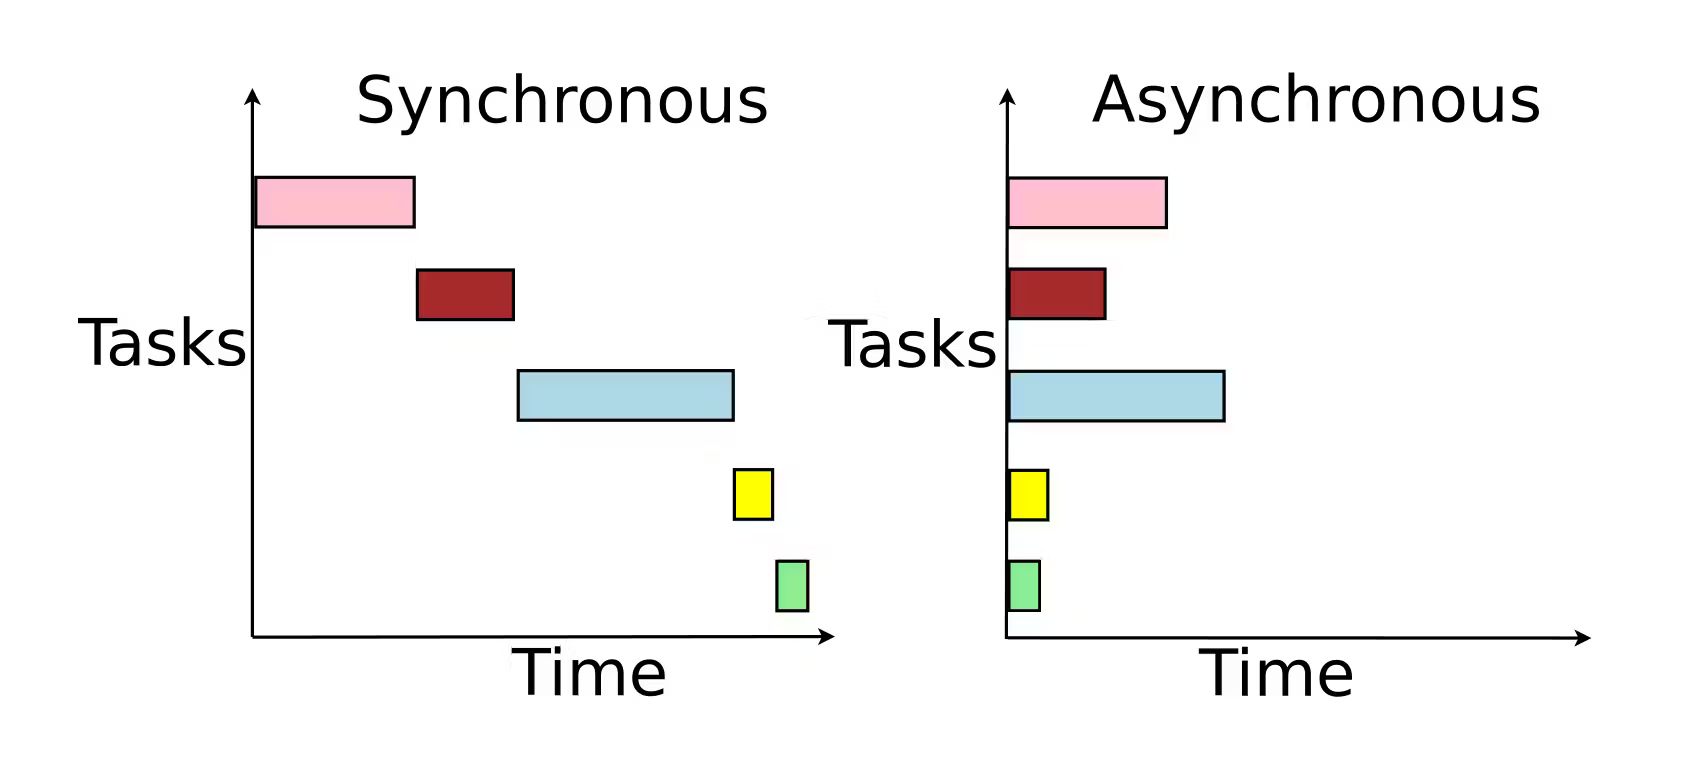

### Performence improvement (inference speed)

#### Async Support with ainvoke

In [144]:
start_time = time.time() 

result = retrieval_chain.ainvoke(question)

print('Time taken:',time.time() - start_time)

Time taken: 5.507469177246094e-05


#### Batch Support 
 - Call model once for multiple inputs (depends on the LLM)

In [147]:
start_time = time.time() 

batch_output = retrieval_chain.batch([
                        "Tell me about Japan's industrial growth",
                        "What James McIlroy is aiming in sports?"
                       ])

print('Time taken:',time.time() - start_time)

Time taken: 8.898752927780151


In [161]:
batch_output

['\nAnswer: According to the given context, there is a repeated mention of "industrial revival hope for Japan." However, the context does not provide specific information about Japan\'s current industrial growth or past industrial achievements. Therefore, based on the context alone, it is not possible to give a comprehensive answer about Japan\'s industrial growth.',
 '\nAnswer: James McIlroy is aiming for the Madrid title in sports.']

### Async Batch 

In [152]:
start_time = time.time() 

batch_output = await retrieval_chain.abatch([
                        "Tell me about Japan's industrial growth",
                        "What James McIlroy is aiming in sports?"
                       ])

print('Time taken:',time.time() - start_time)

Time taken: 2.0609490871429443


/var/folders/zb/3gmj339s2t14d125p9p1l1d00000gn/T/ipykernel_5701/3614412974.py:3: RuntimeWarning: coroutine 'RunnableSequence.abatch' was never awaited
  batch_output = await retrieval_chain.abatch([


In [162]:
batch_output

['\nAnswer: According to the given context, there is a repeated mention of "industrial revival hope for Japan." However, the context does not provide specific information about Japan\'s current industrial growth or past industrial achievements. Therefore, based on the context alone, it is not possible to give a comprehensive answer about Japan\'s industrial growth.',
 '\nAnswer: James McIlroy is aiming for the Madrid title in sports.']

### Using itemgetter

In [186]:
my_dict = {'Youtube': '@AritraSen','Blog': 'Denken' , 'Website' : 'aritrasen.com'}
my_dict

{'Youtube': '@AritraSen', 'Blog': 'Denken', 'Website': 'aritrasen.com'}

In [187]:
from operator import itemgetter

website = itemgetter('Website')

In [188]:
website(my_dict)

'aritrasen.com'

In [189]:
template = """Answer the question based only on the following context:
{context}

Question: {question}

Answer in the following language: {language}
"""
prompt = PromptTemplate.from_template(template)


retrieval_chain = (
    RunnableParallel({"context": itemgetter('question') | retriever,
                       "question": itemgetter('question'),
                       "language": itemgetter('language')
                       })
    | prompt
    | llm
    | StrOutputParser()
    )

In [193]:
### itemgetter only works with dictionaries , input has to be a dict

response = retrieval_chain.invoke({'question': "Tell me about Japan's industrial growth",
                        'language': "Spnish"})

print(response)


Answer: La industria japonesa está experimentando un resurgimiento de esperanza. (The Japanese industry is experiencing a resurgence of hope.)

This answer is based on the repeated mention of "industrial revival hope for Japan" in the context. It does not provide any specific details about the nature or causes of the industrial growth mentioned. The answer is given in Spanish as requested.


### Bind Tools

In [175]:
import os
from dotenv import load_dotenv

load_dotenv()


from langchain_openai import ChatOpenAI

# Now you can access your environment variables using os.environ
os.environ['OPENAI_API_KEY'] = os.environ.get("OPENAI_API_KEY")


model = ChatOpenAI(temperature=0)

In [176]:
import json
from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

@tool
def multiply(first_number: int, second_number: int):
    """Multiplies two numbers together."""
    return first_number * second_number

model_with_tools = model.bind(tools=[convert_to_openai_tool(multiply)])

In [177]:
response = model_with_tools.invoke('What is 35 * 46?')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [178]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NknTjXhpX1CqCwuej0QKBCqq', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 69, 'total_tokens': 88}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-696bfef5-d9be-4013-b06f-cfc3175ef8ca-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 35, 'second_number': 46}, 'id': 'call_NknTjXhpX1CqCwuej0QKBCqq'}])

### Stream Support

In [214]:
template = 'Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n'

prompt = PromptTemplate.from_template(template=template)

chain = prompt | model  

In [215]:
for s in chain.stream({'skill':'Big Data'}):
    print(s.content,end='')

Sure! Here are the top 5 things you should learn when studying Big Data:

1. Hadoop: Hadoop is an open-source framework that allows for the distributed processing of large data sets across clusters of computers. It is essential for storing, processing, and analyzing big data.

2. Apache Spark: Apache Spark is a fast and general-purpose cluster computing system that provides in-memory data processing capabilities. It is commonly used for real-time data processing and machine learning.

3. Data Visualization: Data visualization is the graphical representation of information and data. Learning how to create effective visualizations can help you communicate insights from big data in a clear and concise manner.

4. Machine Learning: Machine learning is a subset of artificial intelligence that focuses on developing algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data. Understanding machine learning techniques can help you extra